# 链表知识点

---

# 1. 链表基础知识

## 1.1 链表简介

### 1.1.1 链表的定义

> 链表（Linked List）：一种线性表数据结构。它使用一组任意的存储单元（可以是连续的，也可以是不连续的），来存储一组具有相同类型的数据。

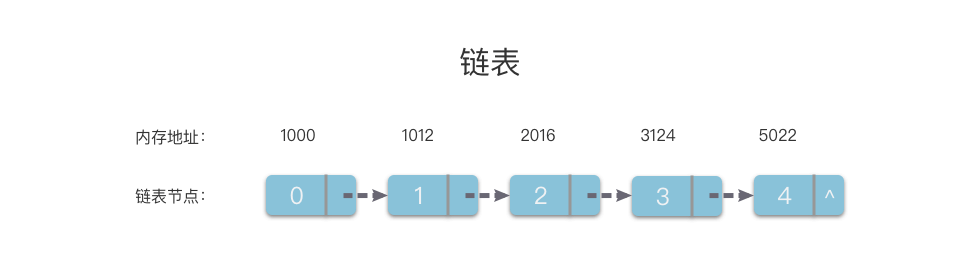

如上图所示，链表通过将一组任意的存储单元串联在一起。其中，每个数据元素占用若干存储单元的组合称为一个「链节点」。为了将所有的节点串起来，每个链节点不仅要存放一个数据元素的值，还要存放一个指出这个数据元素在逻辑关系上的直接后继元素所在链节点的地址，该地址被称为「后继指针$next$」。

- **优点**：存储空间不必事先分配，在需要存储空间的时候可以临时申请，不会造成空间的浪费；一些操作的时间效率远比数组高（插入、移动、删除元素等）。
- **缺点**：不仅数据元素本身的数据信息要占用存储空间，指针也需要占用存储空间，链表结构比数组结构的空间开销大。

### 1.1.2 双向链表

> 双向链表（Doubly Linked List）：链表的一种，也叫做双链表。它的每个链节点中有两个指针，分别指向直接后继和直接前驱。

- **双向链表特点**：从双链表的任意一个节点开始，都可以很方便的访问它的前驱节点和后继节点。

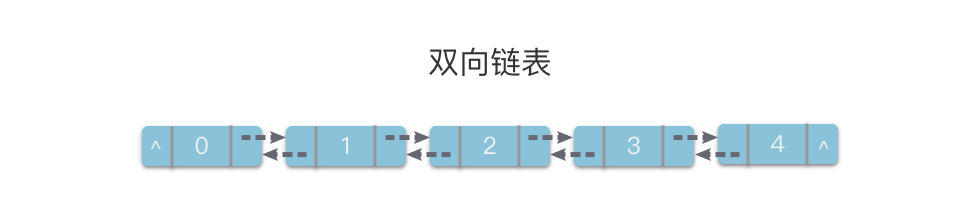

### 1.1.3 循环链表

> 循环链表（Circular linked list）：链表的一种。它的最后一个链节点指向头节点，形成一个环。

- **循环链表特点**：从循环链表的任何一个节点出发都能找到任何其他节点。

## 1.2 链表的基本操作

基本操作无非是增删改查

### 1.2.1 链表的结构定义

链表是由链节点通过$next$链接而构成的，我们可以先定义一个简单的「链节点类」，再来定义完整的「链表类」。

- **链节点类（ListNode类）**：使用成员变量$val$表示数据元素的值，使用指针变量$next$表示后继指针。

- **链表类（LinkedList类）**：使用一个链节点变量$head$来表示链表的头节点。

我们在创建空链表时，只需要把相应的链表头节点变量设置为空链接即可。

In [1]:
# 链节点类
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

# 链表类
# class LinkedList:
#     def __init__(self):
#         self.head = None


### 1.2.2 建立线性链表

> **建立一个线性链表**：根据线性表的数据元素动态生成链节点，并依次将其连接到链表中。
> 1. 从所给线性表的第1个数据元素开始依次获取表中的数据元素。
> 2. 每获取一个数据元素，就为该数据元素生成一个新节点，将新节点插入到链表的尾部。
> 3. 插入完毕之后返回第1个链节点的地址。

In [3]:
# 根据 data 初始化一个新链表
# def create(self, data):
#     self.head = ListNode(0)
#     cur = self.head
#     for i in range(len(data)):
#         node = ListNode(data[i])
#         cur.next = node
#         cur = cur.next

「建立一个线性链表」的操作依赖于线性表的数据元素个数，因此，「建立一个线性链表」的时间复杂度为$O(n)$，$n$为线性表长度。

### 1.2.3 求线性链表的长度

> 使用指针变量$cur$顺着链表$next$指针移动并使用计数器$count$记录元素个数。
> 1. 让指针变量$cur$指向链表的第一个链节点（也就是head）
> 2. 顺着链节点的$next$指针遍历链表，指针变量$cur$每指向一个链节点，计数器计数一次。
> 3. 等$cur$指向为空时结束遍历，此时计数器的数值为链表的长度。

In [ ]:
# 获取线性链表长度
# def length(self):
#     count = 0
#     cur = self.head
#     while cur:
#         count += 1
#         cur = cur.next 
#     return count


「求线性链表长度」的操作依赖于线性表的数据元素个数，链表的链节点个数，操作的次数为$n$，因此，「建立一个线性链表」的时间复杂度为$O(n)$，$n$为线性表长度。

### 1.2.4 查找元素

> **在链表中查找值为$val$的元素**：从头节点$head$开始，沿着链表节点逐一进行查找。如果查找成功，返回被查找节点的地址；否则返回$None$。
> 1. 让指针变量$cur$指向链表的第1个链节点。
> 2. 顺着链节点的$next$指针遍历链表，如果遇到$cur.val==val$，则返回当前指针变量$cur$。
> 3. 如果$cur$指向为空时也未找到，则该链表中没有值为$val$的元素，则返回$None$。

In [ ]:
# 查找元素：在链表中查找值为 val 的元素
# def find(self, val):
#     cur = self.head
#     while cur:
#         if val == cur.val:
#             return cur
#         cur = cur.next

#     return None

「在链表中查找值为$val$的元素」的操作依赖于链表的链节点个数，因此，「在链表中查找值为$val$的元素」的时间复杂度为$O(n)$，$n$为线性表长度。

### 1.2.5 插入元素

分为三种：
- **链表头部插入元素**：在链表第1个链节点之前插入值为$val$的链节点。
- **链表尾部插入元素**：在链表最后1个链节点之后插入值为$val$的链节点。
- **链表中间插入元素**：在链表第$i$个链节点之前插入值为$val$的链节点。

#### 1.2.5.1 链表头部插入元素

> 1. 先创建一个值为$val$的链节点$node$。
> 2. 将$node$的$next$指针指向链表的头节点$head$。
> 3. 再将链表的头节点$head$指向$node$

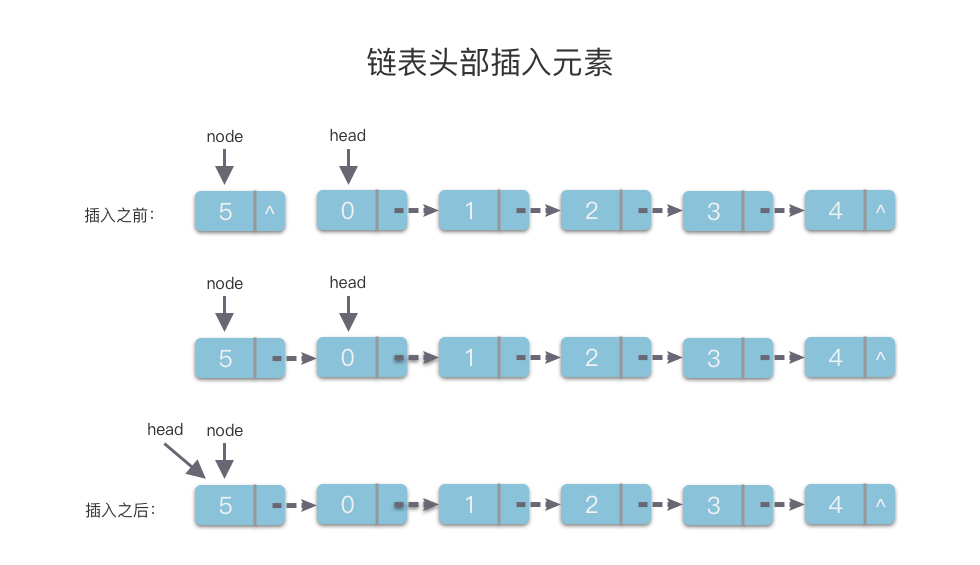

In [4]:
# # 链表头部插入元素
# def insertFront(self, val):
#     node = ListNode(val)
#     node.next = self.head
#     self.head = node

「链表头部插入元素」的操作与链表的长度无关，因此，「链表头部插入元素」的时间复杂度为$O(1)$

#### 1.2.5.2 链表尾部插入元素

> 1. 先创建一个值为$val$的链节点$node$。
> 2. 使用$cur$指针指向链表的头节点$head$。
> 2. 通过链节点的$next$指针移动$cur$指针，遍历链表，直到$cur.next$为$None$。
> 3. 令$cur.next$指向新的链节点$node$。

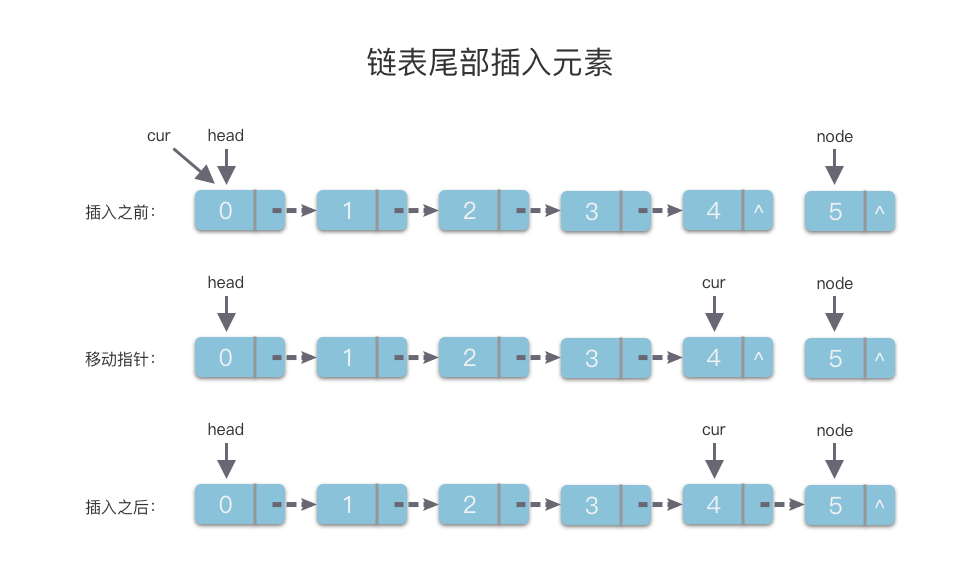

In [5]:
# # 链表尾部插入元素
# def insertRear(self, val):
#     node = ListNode(val)
#     cur = self.head
#     while cur.next:
#         cur = cur.next
#     cur.next = node

「链表尾部插入元素」的操作需要将$cur$从链表头部移动到尾部，操作次数是$n$次，因此，「链表尾部插入元素」的时间复杂度是$O(n)$

#### 1.2.5.3 链表中间插入元素

> 在链表第$i$个链节点执勤啊插入值为$val$的链节点。
> 1. 使用指针变量$cur$和计数器$count$。让$cur$指向链表的头节点$head$，$head$的初始值为0。
> 2. 沿着链表的$next$指针遍历链表，指针变量$cur$每指向一个链节点，$count$加一。
> 3. 当$count$为$i-1$时，停止遍历。
> 4. 创建一个值为$val$的链节点$node$。
> 5. 将$node.next$指向$cur.next$。
> 6. 将$cur.next$指向$node$。


In [1]:
# # 链表中间插入元素
# def insertInside(self, index, val):
#     count = 0
#     cur = self.head
#     while cur and count < index - 1:
#         count += 1
#         cur = cur.next
        
#     if not cur:
#         return 'Error'
    
#     node = ListNode(val)
#     node.next = cur.next
#     cur.next = node

「链表中间插入元素」的操作需要将$cur$从链表头部移动到第$i$个链节点之前，操作的平均时间复杂度是$O(n)$，因此，「链表中间插入元素」的时间复杂度是$O(n)$。

### 1.2.6 改变链表元素

> **将链表的第$i$个元素值改为$val$**：首先要遍历到第$i$个链节点，然后直接更改第$i$个链节点的值。
> 1. 使用指针变量$cur$和计数器$count$。让$cur$指向头节点，让$count$初始值为0。 
> 2. 沿着链节点的$next$指针遍历链表，指针变量$cur$每指向一个链节点，$count$加1。
> 3. 当$count$为$i$时，停止遍历。
> 4. 更改$cur$的值为$val$。

In [2]:
# # 改变元素：将链表中第 i 个元素值改为 val
# def change(self, index, val):
#     count = 0
#     cur = self.head
#     while cur and count < index:
#         count += 1
#         cur = cur.next
        
#     if not cur:
#         return 'Error'
    
#     cur.val = val


「改变链表元素值」的操作需要将$cur$从链表头部移动到第$i$个链节点，操作的平均时间复杂度是$O(n)$，因此，「改变链表元素值」的时间复杂度是$O(n)$。

### 1.2.7 删除元素

> - **删除链表头部元素**：删除链表第1个链节点。
> - **删除链表尾部元素**：删除链表最后一个链节点。
> - **删除链表中间元素**：删除链表第$i$个链节点。

#### 1.2.7.1 删除头部元素

> 直接将$self.head$沿着$next$指针向右移动一步。

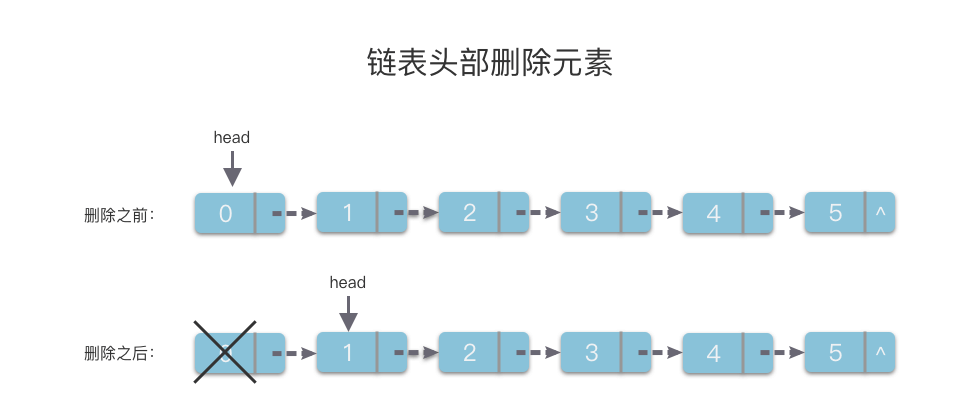

In [3]:
# # 链表头部删除元素
# def removeFront(self):
#     if self.head:
#         self.head = self.head.next


时间复杂度为$O(1)$

#### 1.2.7.2 尾部删除元素

> 1. 使用指针变量$cur$遍历到链表的倒数第2个链节点。
> 2. 将此节点的$next$指针指向$None$。

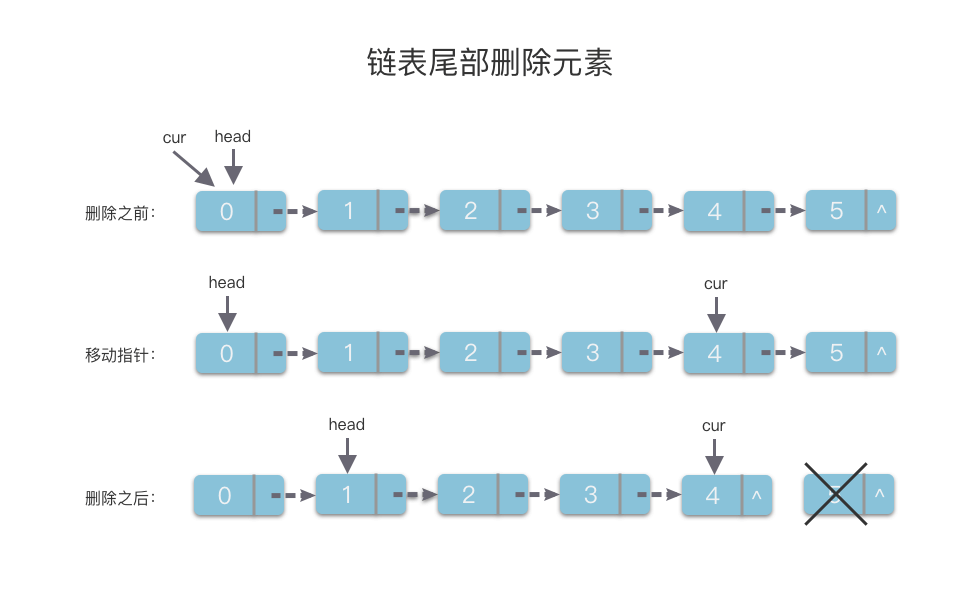

In [4]:
# # 链表尾部删除元素
# def removeRear(self):
#     if not self.head or not self.head.next:
#         return 'Error'

#     cur = self.head
#     while cur.next.next:
#         cur = cur.next
#     cur.next = None


「链表尾部删除元素」的操作涉及到移动到链表尾部，操作次数为$n-2$次，因此，「链表尾部删除元素」的时间复杂度为$O(n)$。

#### 1.2.7.3 中间删除元素

> 1. 使用指针变量$cur$遍历到链表的倒数第$i-1$个链节点。
> 2. 将$cur.next$指向$cur.next.next$。

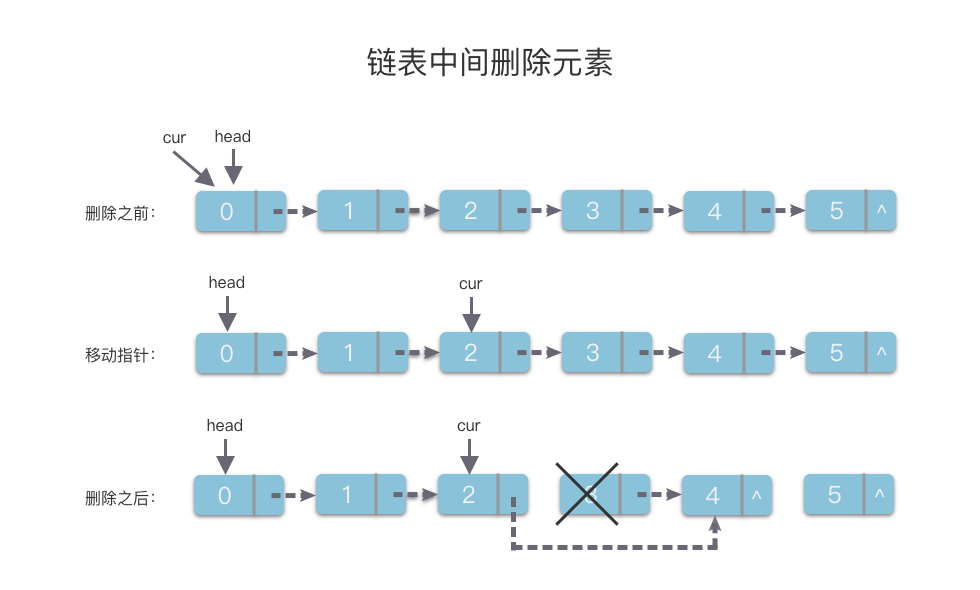

In [ ]:
# # 链表中间删除元素
# def removeInside(self, index):
#     count = 0
#     cur = self.head
    
#     while cur.next and count < index - 1:
#         count += 1
#         cur = cur.next
        
#     if not cur:
#         return 'Error'
        
#     del_node = cur.next
#     cur.next = del_node.next

「链表中间删除元素」的操作涉及到移动到第$i$个链节点之前，操作的平均时间复杂度是$O(n)$，因此，「链表中间删除元素」的时间复杂度是$O(n)$。

---

## 1.3 链表基础知识总结

> 总的LinkedList类代码如下：

In [5]:
# 链表类
class LinkedList:
    def __init__(self):
        self.head = None

# 根据 data 初始化一个新链表
    def create(self, data):
        self.head = ListNode(0)
        cur = self.head
        for i in range(len(data)):
            node = ListNode(data[i])
            cur.next = node
            cur = cur.next

# 获取线性链表长度
    def length(self):
        count = 0
        cur = self.head
        while cur:
            count += 1
            cur = cur.next 
        return count

# 查找元素：在链表中查找值为 val 的元素
    def find(self, val):
        cur = self.head
        while cur:
            if val == cur.val:
                return cur
            cur = cur.next

        return None
    
# 链表头部插入元素
    def insertFront(self, val):
        node = ListNode(val)
        node.next = self.head
        self.head = node
        
# 链表尾部插入元素
    def insertRear(self, val):
        node = ListNode(val)
        cur = self.head
        while cur.next:
            cur = cur.next
        cur.next = node

# 链表中间插入元素
    def insertInside(self, index, val):
        count = 0
        cur = self.head
        while cur and count < index - 1:
            count += 1
            cur = cur.next
            
        if not cur:
            return 'Error'
        
        node = ListNode(val)
        node.next = cur.next
        cur.next = node

# 改变元素：将链表中第 i 个元素值改为 val
    def change(self, index, val):
        count = 0
        cur = self.head
        while cur and count < index:
            count += 1
            cur = cur.next
            
        if not cur:
            return 'Error'
        
        cur.val = val

# 链表头部删除元素
    def removeFront(self):
        if self.head:
            self.head = self.head.next

# 链表尾部删除元素
    def removeRear(self):
        if not self.head or not self.head.next:
            return 'Error'

        cur = self.head
        while cur.next.next:
            cur = cur.next
        cur.next = None

# 链表中间删除元素
    def removeInside(self, index):
        count = 0
        cur = self.head
        
        while cur.next and count < index - 1:
            count += 1
            cur = cur.next
            
        if not cur:
            return 'Error'
            
        del_node = cur.next
        cur.next = del_node.next

链表是最基础、最简单的数据结构。「链表」是实现线性表的链式存储结构的基础。它使用一组任意的存储单元（可以是连续的，也可以是不连续的），来存储一组具有相同类型的数据。
链表最大的优点在于可以灵活的添加和删除元素。
- 链表进行访问元素、改变元素操作的时间复杂度为$O(n)$。
- 链表进行头部插入、头部删除元素操作的时间复杂度是$O(1)$。
- 链表进行尾部插入、尾部删除操作的时间复杂度是$O(n)$。
- 链表在普通情况下进行插入、删除元素操作的时间复杂度为$O(n)$。

# 2. 链表排序知识

## 2.1 链表排序简介

# 3. 链表双指针知识

## 3.1 链表双指针简介

在单链表中，因为遍历节点只能顺着$next$指针方向进行，所以对于链表而言，一般只会用到「快慢指针」和「分离双指针」。其中链表的「快慢指针」又分为「起点不一致的快慢指针」和「步长不一致的快慢指针」。这几种类型的双指针所解决的问题也各不相同，下面我们一一进行讲解。

## 3.2 起点不一致的快慢指针

> 起点不一致的快慢指针：指的是两个指针从同一侧开始遍历链表，但是两个指针的起点不一样。 快指针$fast$比慢指针$slow$先走$n$步，直到快指针移动到链表尾端时为止。

### 3.2.1 求解步骤

1. 使用两个指针$fast$和$slow$。$slow$和$fast$都指向链表的头节点$head$。
2. 让快指针$fast$先向右移动$n$步。然后同时让慢指针$slow$和快指针$fast$向右移。
3. 当快指针移动到链表尾部（$fast==None$）时跳出循环。

### 3.2.2 伪代码模板

```python
slow = head
fast = head

while n:
    fast = fast.next
    n -= 1
while fast:
    fast = fast.next
    slow = slow.next
```


### 3.2.3 起点不一致的快慢指针适用范围

起点不一致的快慢指针主要用于找到链表中倒数第 k 个节点、删除链表倒数第 N 个节点等。

### 3.2.4 例题：LeetCode 19.删除链表的倒数第N个结点

https://leetcode.cn/problems/remove-nth-node-from-end-of-list/description/

[19删除链表的倒数第 N 个结点.py](\双指针\19删除链表的倒数第N个结点.py)

## 3.3 步长不一致的快慢指针

> 步长不一致的快慢指针：指的是两个指针从同一侧开始遍历链表，但是两个指针的步长不一样。 例如快指针$fast$每次比慢指针$slow$多走$n$步，直到快指针移动到链表尾端时为止。

### 3.3.1 求解步骤

1. 使用两个指针$fast$和$slow$。$slow$和$fast$都指向链表的头节点$head$。
2. 快指针$fast$和慢指针$slow$同时向右移，但是移动步长不一致。比如慢指针每次移动1步，即$slow=slow.next$；快指针每次移动2步，即$fast=fast.next.next$。
3. 当快指针移动到链表尾部（$fast==None$）时跳出循环。

### 3.3.2 伪代码

```python
fast = head
slow = head

while fast and fast.next: # 这两个判断条件和链表的长度的奇偶性有关
    slow = slow.next
    fast = fast.next.next
```

### 3.3.3 步长不一致的快慢指针适用范围

步长不一致的快慢指针适合寻找链表的中点、判断和检测链表是否有环、找到两个链表的交点等问题。

### 3.3.4 例题：LeetCode 876.链表的中间节点和141.环形链表

- https://leetcode.cn/problems/middle-of-the-linked-list/description/
- https://leetcode.cn/problems/linked-list-cycle/description/

[876链表的中间结点.py](\双指针\876链表的中间结点.py)

[141环形链表.py](\双指针\141环形链表.py)

## 3.4 分离双指针

### 3.4.1 求解步骤

1. 使用两个指针$left_1$和$left_2$。$left_1$指向第一个链表头节点，即：$left_1= list1$，$left_2$指向第二个链表头节点，即：$left_2= list2$。
2. 当满足一定条件时，两个指针同时右移，即$left_1 = left_1.next$、$left_2 = left_2.next$。
3. 当满足另外一定条件时，$left_1$右移，即$left_1 = left_1.next$。
3. 当满足另外一定条件时，$left_2$右移，即$left_2 = left_2.next$。
3. 当其中一个链表遍历完时或者满足其他特殊条件时跳出循环体。

### 3.4.2 伪代码

```python 
left_1 = list1
left_2 = list2

while left_1 and left_2:
    if 一定条件 1:
        left_1 = left_1.next
        left_2 = left_2.next
    elif 一定条件 2:
        left_1 = left_1.next
    elif 一定条件 3:
        left_2 = left_2.next
```

### 3.4.3 适用范围

分离双指针一般用于有序链表合并等问题。

### 3.4.4 例题：LeetCode 21.合并两个有序链表

https://leetcode.cn/problems/merge-two-sorted-lists/description/

[21合并两个有序链表.py](\双指针\21合并两个有序链表.py)